# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph
from metrics import pearson
from models import CNN
from utils import prepare_data, set_variables

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_arch2'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

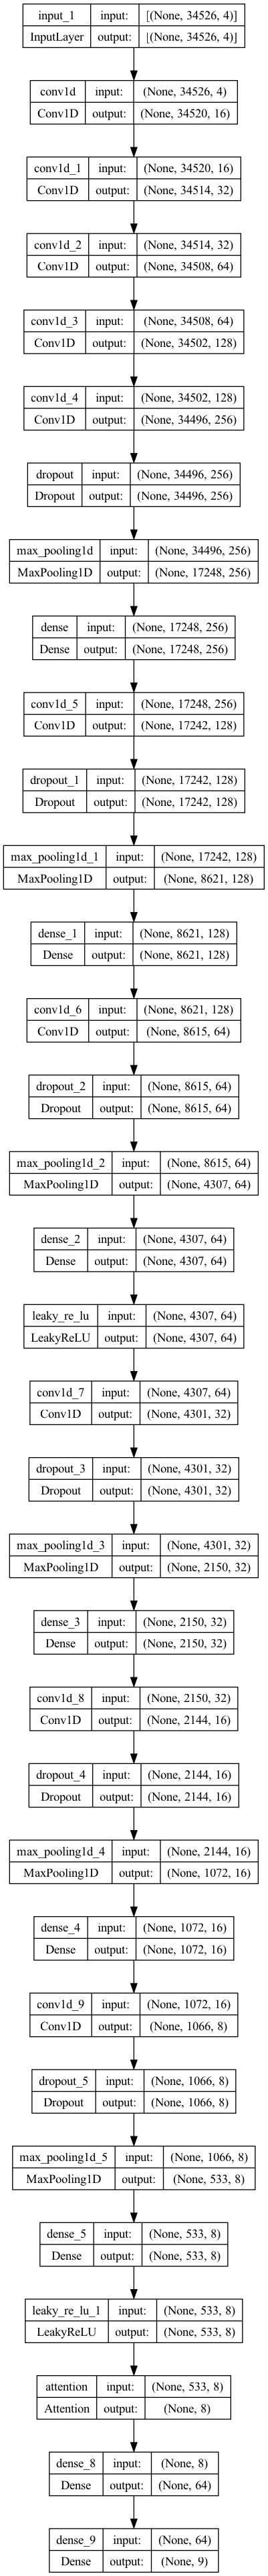

In [4]:
model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            metrics=[pearson]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34526, 4)]        0         
                                                                 
 conv1d (Conv1D)             (None, 34520, 16)         448       
                                                                 
 conv1d_1 (Conv1D)           (None, 34514, 32)         3584      
                                                                 
 conv1d_2 (Conv1D)           (None, 34508, 64)         14336     
                                                                 
 conv1d_3 (Conv1D)           (None, 34502, 128)        57344     
                                                                 
 conv1d_4 (Conv1D)           (None, 34496, 256)        229376    
                                                                 
 dropout (Dropout)           (None, 34496, 256)        0     

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/10
311/311 [==============================] - 5923s 19s/step - loss: 92.8956 - pearson: 0.0216 - val_loss: 35.8159 - val_pearson: 2.3583e-05
Epoch 2/10
311/311 [==============================] - 2463s 8s/step - loss: 15.2971 - pearson: 1.4070e-04 - val_loss: 6.2324 - val_pearson: 1.5367e-11
Epoch 3/10
311/311 [==============================] - 2686s 9s/step - loss: 4.3920 - pearson: -4.5799e-04 - val_loss: 3.2939 - val_pearson: 3.3855e-10
Epoch 4/10
311/311 [==============================] - 2563s 8s/step - loss: 2.9370 - pearson: 8.2269e-05 - val_loss: 2.6837 - val_pearson: -5.3247e-14
Epoch 5/10
311/311 [==============================] - 2649s 9s/step - loss: 2.5958 - pearson: 6.7209e-05 - val_loss: 2.5404 - val_pearson: 3.2317e-10
Epoch 6/10
311/311 [==============================] - 2601s 8s/step - loss: 2.5054 - pearson: 1.0599e-06 - val_loss: 2.4853 - val_pearson: 7.6347e-14
Epoch 7/10
311/311 [==============================] - 14674s 47s/step - loss: 2.4801 - pearson: -7

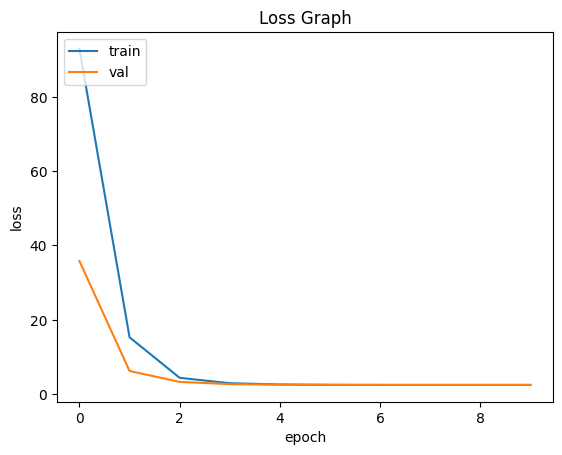

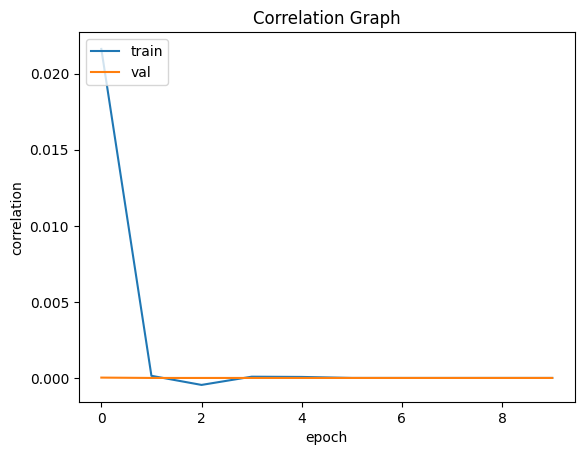

In [7]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

plt_data = [history.history['pearson'], history.history['val_pearson']]
plot_line_graph(plt_data, "Correlation Graph", 'correlation', 'epoch', ['train', 'val'])

In [8]:
model.print_model(model_architecture_path)
model.save_model(model_output_path)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/b7/2447cny161d6nzl8rj07yssr0000gn/T/ipykernel_6062/1161845082.py", line 2, in <module>
    model.save_model(model_output_path)
  File "/Users/jonasflor/Desktop/TUM/rna-localization/models/singlebranchModel.py", line 91, in save_model
    super().save_model(path)
  File "/Users/jonasflor/Desktop/TUM/rna-localization/models/model.py", line 61, in save_model
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/Users/jonasflor/mambaforge/envs/rna_localization/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 825, in get_config
    raise NotImplementedError(
NotImplement